In [ ]:
# Lab EDA Univariate Analysis: Diving into Amazon UK Product Insights

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [5]:
# Loading the Amazon UK product dataset
archivo = "Escritorio/Ironhack/Labs/19. lab-eda-univariate/amz_uk_price_prediction_dataset.csv"
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [6]:
# Display the first few rows of the dataset
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [7]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(2443651, 9)

In [8]:
# Displaying the data types of each column in the dataframe
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [9]:
# Part 1: Understanding Product Categories
# Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
# 1. Frequency Tables
# Generate a frequency table for the product category.
category_table = pd.crosstab(index = df["category"],  # Make a crosstab
                              columns="count")      # Name the count column
category_table

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [17]:
# Which are the top 5 most listed product categories?
# Sort the category_table in descending order 
sorted_category_table = category_table.sort_values(by="count", ascending=False)

# Select  the top 5 most listed product categories
top_categories = sorted_category_table.head(5)
top_categories

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


In [ ]:
# 2.Visualizations
# Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
sns.barplot(x=category_table.index, y=category_table["count"], palette="Set3");

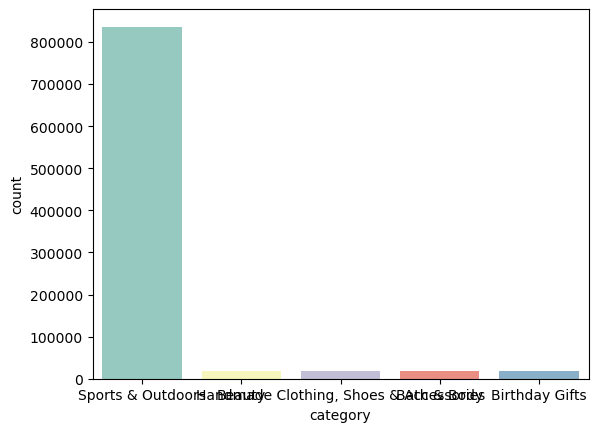

In [31]:
# There are too many categories so we create the bar chart only with the top 5 categories in the 'category' column
sns.barplot(x=top_categories.index, y=top_categories["count"], palette="Set3",);

<Axes: ylabel='count'>

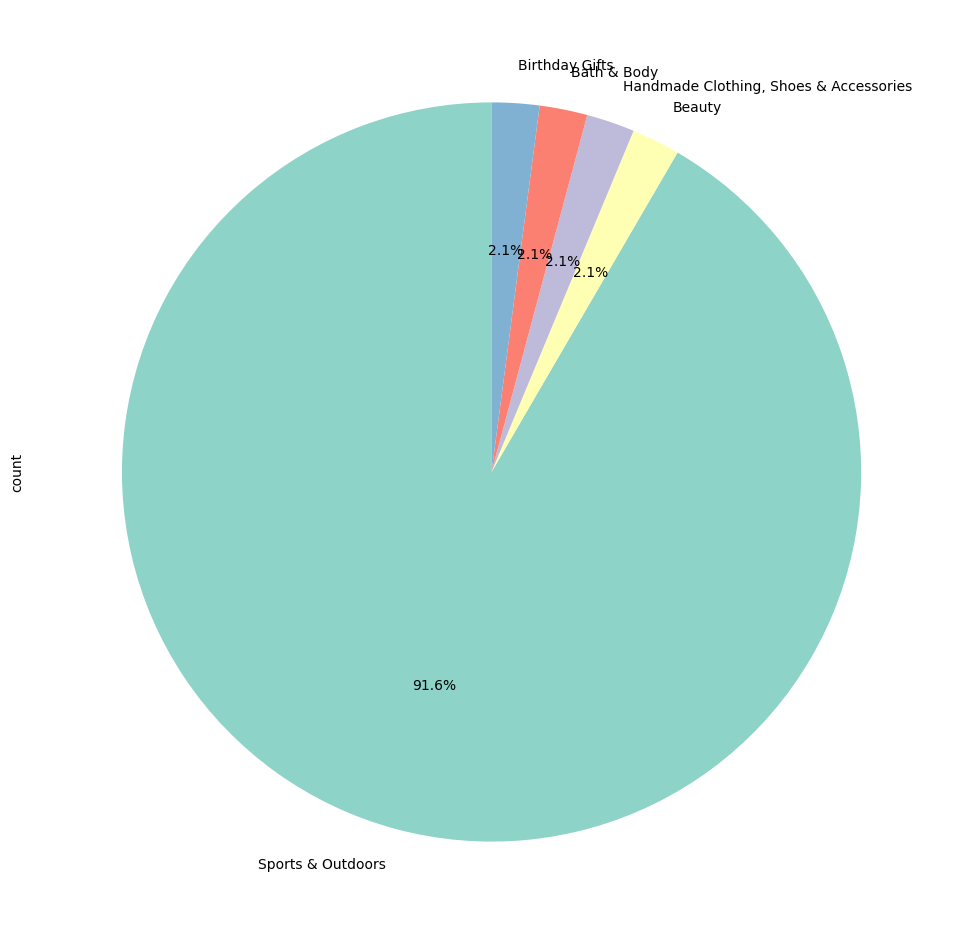

In [27]:
# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
# Calculate the propotions of each category 
total_count = top_categories['count'].sum()
category_proportions = top_categories['count'] / total_count
# Create a pie chart showing the proportions of each category
category_proportions.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"),figsize=(18, 12))

In [48]:
# Does any category dominate the listings?
dominant_category = top_categories.index[0]
dominant_percentage = category_proportions[0] * 100

print(f"The dominating category is '{dominant_category}' with {dominant_percentage:.2f}% of the lists.")

The dominating category is 'Sports & Outdoors' with 91.61% of the lists.


In [40]:
# Part 2: Delving into Product Pricing
# Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?
# 1. Measures of Centrality:
# Calculate the mean, median, and mode for the price of products.
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [37]:
# What's the average price point of products listed? How does this compare with the most common price point (mode)?
print(f"The average price ponit is {mean_price}")
price_comparison = "greater than" if mean_price > mode_price else "lower than" if mean_price < mode_price else "equal to"
print(f"The average price point is {price_comparison} the most common price point, which is {mode_price}.")

The average price ponit is 89.24380943923663
The average price point is greater than the most common price point, which is 9.99.


In [42]:
# 2. Measures of Dispersion:
# Determine the variance, standard deviation, range, and interquartile range for product price.
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

variance_price, std_dev_price, range_price, price_iqr

(119445.4853225653, 345.6088617535223, 100000.0, 36.0)

##### How varied are the product prices? Are there any indicators of a significant spread in prices?
There is a big variability between product prices. Product prices are very varied because there is a high variance and a high standard deviation. There is a huge spread in prices, as the range in prices is very wide. The IQR range shows little different between the first quartile and the third quartile, which means that most product prices fall within a specific range of prices(the first one). 

<Axes: xlabel='price', ylabel='Count'>

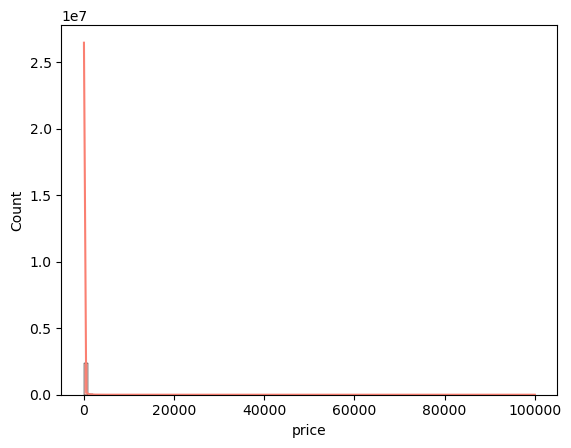

In [56]:
# 3. Visualizations
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
sns.histplot(df['price'], kde=True, bins=100, color="salmon")

##### If its hard to read these diagrams, think why this is, and explain how it could be solved..
The first price range is where all the product prices are. The problem is the data for product prices is so spread that the histogram tries to show every product price in the range, being 100000 its maximum value. The histogram is hard to read because the majority of the data lies in the first group of product prices, being its mean value around 89.24 and the median value 19.09. No matter how big you make the histogram, it still has outliers that it takes into account making it impossible to read properly the part of the histogram where the majority of the product prices lies in. 
To solve this problem, we could get rid of outliers (even though it would affect the mean) because they affect the distribution of our data and difficult us the reading of the histogram.

<Axes: >

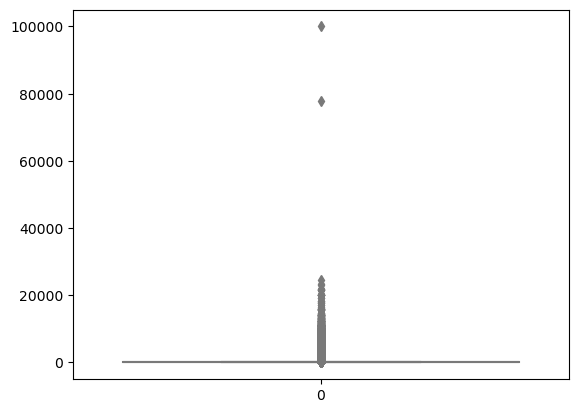

In [57]:
# Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.
sns.boxplot(data = df['price'], color="lightblue")

##### Are there products that are priced significantly higher than the rest?
There are products that are priced significantly higher than the rest. As we can see in the box plot, there are some outliers with very high prices, although the majority of the product prices fall within a little range, at the beginning of the box plot, between the first quartile and the third quartile. Despite of this, there are also some outliers outside the IQR, even though they are not as extreme as the other outliers.

In [60]:
# Part 3: Unpacking Product Ratings
# Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?
# 1. Measures of Centrality:
# Calculate the mean, median, and mode for the rating of products.
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating

(2.152836472966065, 0.0, 0.0)

##### How do customers generally rate products? Is there a common trend?
Customers generally give a low rating to products. We can see a trend of this behaviour because the average rating is approximately 2.15, which means that products, on average, tend to get a low rating. The median of 0.0 shows that 50% of the ratings are below 0 or equal to 0, which might be concerning because it means that a big proportion of products has been rated very poorly. The mode being 0.0 means that the most repeated rating for products by customers is 0, which is the minimun possible rating and it is also quite concerning.


In [61]:
# 2. Measures of Dispersion:
# Determine the variance, standard deviation, and interquartile range for product rating.
variance_rating = df['stars'].var()
std_dev_rating = df['stars'].std()
rating_iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

variance_rating, std_dev_rating, rating_iqr

(4.81743402976196, 2.1948653785054697, 4.4)

#### Are the ratings consistent, or is there a wide variation in customer feedback?
There is a wide variation in customer feedback. The variance of 4.8 means that there is a great dispersion of ratings around the average value. Same happens with the standard deviation, that indicates that there is a variability in the customers ratings. The IQR range is 4.4, which is a big difference between the first quartile and the third quartile, which also shows that the ratings from customers are very varied. 

In [64]:
# 3. Shape of the Distribution:
# Calculate the skewness and kurtosis for the rating column.
skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating, kurtosis_rating

(0.08120735761080985, -1.9260061280432985)

##### Are the ratings normally distributed, or do they lean towards higher or lower values?
The ratings in general are normally distributed, but they are slightly skewed to the right, which means that they lean towards higher values, but it is not significant, as the skew is below 0.1. Regarding the kurtosis (which is about -2), it indicates that the distribution is less sharp and less heavy in the tails compared to a normal distribution. The ratings tend to be more dispersed around the mean and less concentrated at the extremes.


<Axes: xlabel='stars', ylabel='Count'>

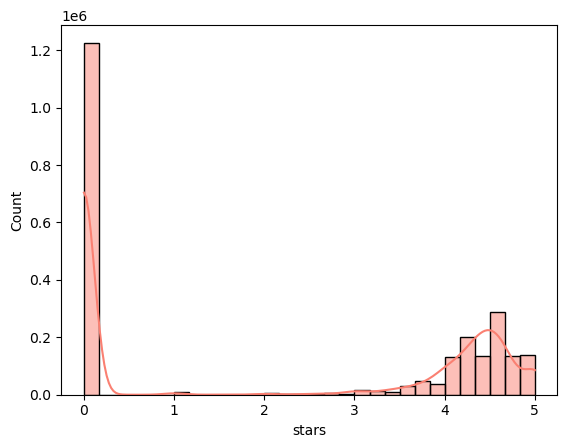

In [65]:
# 4. Visualizations
# Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

##### Is there a specific rating that is more common?
The most common rating is 0, as the majority of the data lies in that range. We already knew that when we calculated the mode of the rating column, but now we can visually see it in the histogram.